# Task 4.9, Part 2

## Import Data and Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create path to folder
path = r'/Users/caitlin/Documents 2/Instacart Basket Analysis 12.2021'

In [5]:
path

'/Users/caitlin/Documents 2/Instacart Basket Analysis 12.2021'

In [6]:
# Download data set
master_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'master_df_2.pkl'))

In [7]:
# Show all columns
pd.options.display.max_columns = None

In [8]:
master_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Create Visualizations

<AxesSubplot:xlabel='prices', ylabel='prices'>

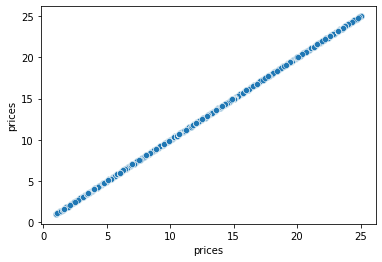

In [8]:
# Create scatterplot 
sns.scatterplot(x = 'prices', y = 'prices',data = master_df)

<AxesSubplot:>

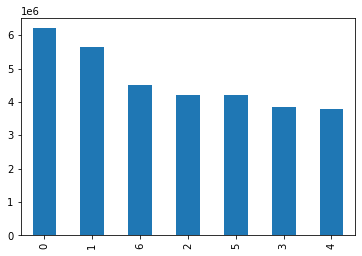

In [9]:
# Create bar chart 
master_df['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

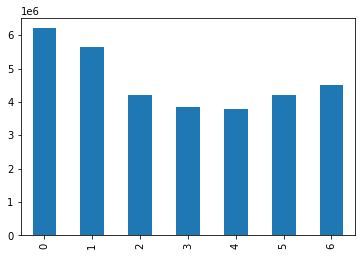

In [10]:
# Create bar chart using sort index - so it is not no ordered largest to smallest
master_df['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

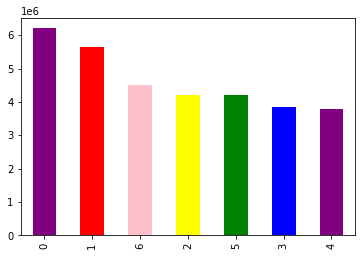

In [11]:
# Create bar chart with color
master_df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'yellow' ,'green', 'blue'])

<AxesSubplot:ylabel='Frequency'>

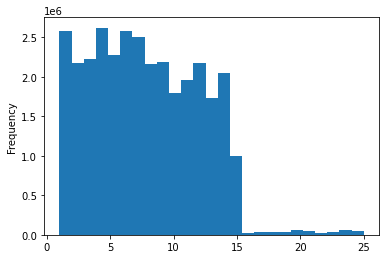

In [12]:
# Create histogram of prices
master_df['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

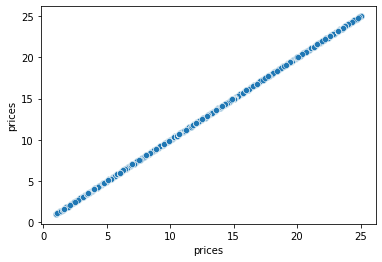

In [13]:
# Create scatterplot 
sns.scatterplot(x = 'prices', y = 'prices',data = master_df)

<AxesSubplot:ylabel='Frequency'>

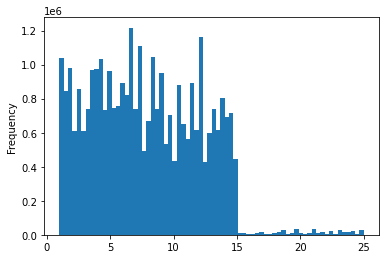

In [14]:
# Create histogram with more granularity
master_df['prices'].plot.hist(bins = 70)

### Line graph - sampling process to make line graph

In [15]:
# Sampling data - create list holding true/false values to test np.random 
np.random.seed(4)
dev = np.random.rand(len(master_df)) <= 0.7

In [16]:
# Examine dev list
dev

array([False,  True, False, ...,  True, False,  True])

Note: It appears as it should because it shows the values are less than or equal to 0.7, which is the desired value. The code creates a list.

In [17]:
# Illustrating random function
np.random.rand(10)

array([0.39916671, 0.19769672, 0.84329406, 0.09095049, 0.04528206,
       0.23055224, 0.64519968, 0.82012101, 0.90021919, 0.2001039 ])

Split dataframe into two samples

In [18]:
# Store 70% of the sample in dataframe named "big"
big = master_df[dev]

In [19]:
# Store 30% of the sample in dataframe named "small"
small = master_df[~dev]

In [20]:
# Check sample subsets
len(master_df)

32399727

In [21]:
len(big) + len(small)

32399727

The numbers from both lines of code match, which shows the sample sizes are accurate.

In [22]:
# Reduce size of sample to necessary columns
df_2 = small[['orders_day_of_week','prices']]

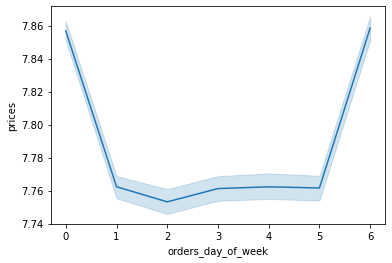

In [23]:
# Create line graph
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

## Histogram of Sales 

<AxesSubplot:ylabel='Frequency'>

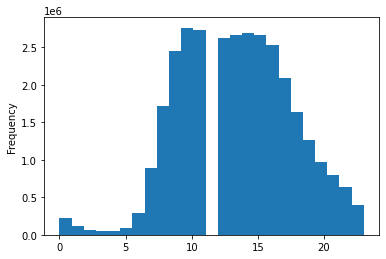

In [24]:
# Histogram of descriptive findings of sales
master_df['order_hour_of_day'].plot.hist(bins = 25)

This histogram demonstrates that the highest number of orders happen in the morning after 8:00 until lunch time and decline steadily after lunch.

## Bar Chart of Loyalty Flag

<AxesSubplot:>

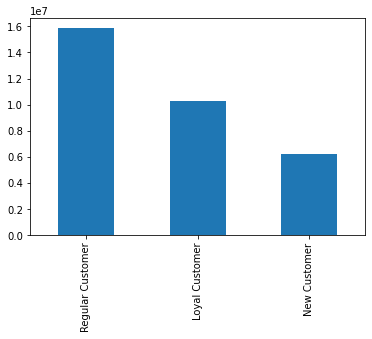

In [25]:
# Create bar chart with loyalty flag
master_df['loyalty_flag'].value_counts().plot.bar()

There are the largest number of regular customers, followed by loyal and then new customers. 

In [26]:
# Create line graph of prices and time - using sample
df_2 = small[['order_hour_of_day','prices']]

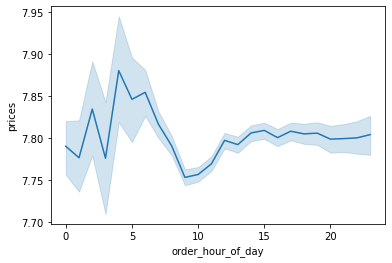

In [27]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

People tend to order more expensive items earlier in the day.

## Customer Demographic Exploratory Analysis

### Relationship between age and family status

In [28]:
# Line graph of age and number of dependents
df_2 = small[['customer_number_dependents','customer_age']]

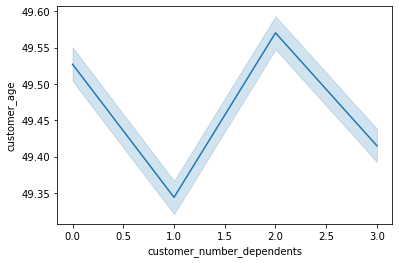

In [29]:
line = sns.lineplot(data = df_2, x = 'customer_number_dependents', y = 'customer_age')

The graph illustrates that customers are most likely to have dependents around age 49.

### Relationship between age and spending power

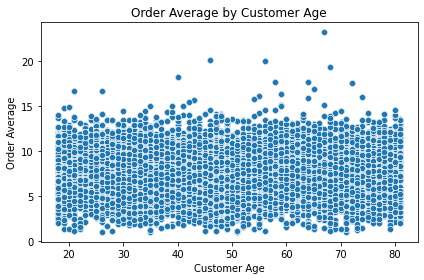

In [8]:
# Create scatterplot customer age and spending power
cust_age_order_scatter = sns.scatterplot(x = 'customer_age', y = 'order_avg',data = master_df)
plt.ylabel("Order Average")
plt.xlabel("Customer Age")
plt.title("Order Average by Customer Age")
plt.tight_layout()

In [9]:
# Export customer age and order average scatterplot
cust_age_order_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_order_scatter.png'))

The scatterplot is a bit inconclusive regarding age and spending power.

In [33]:
master_df['order_avg'].mean()

7.790994149407132

## Export Graphs

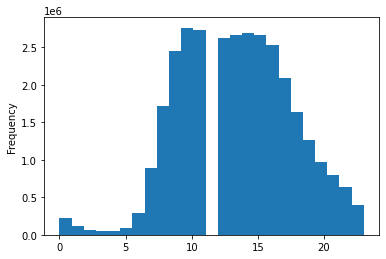

In [34]:
# Export sales histogram
hist = master_df['order_hour_of_day'].plot.hist(bins = 25)

In [35]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_sales.png'))

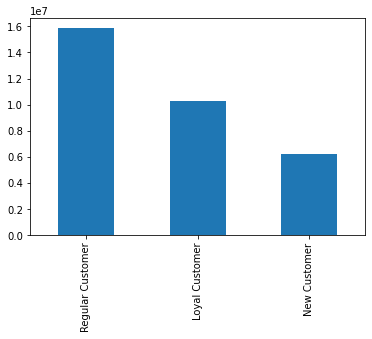

In [37]:
# Export customer loyalty bar chart
bar = master_df['loyalty_flag'].value_counts().plot.bar()

In [38]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_loyalty_bar.png'))

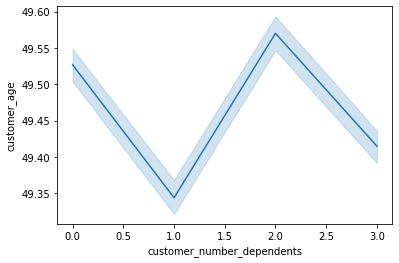

In [39]:
# Export family status and dependents line graph
line = sns.lineplot(data = df_2, x = 'customer_number_dependents', y = 'customer_age')

In [40]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_age_line.png'))

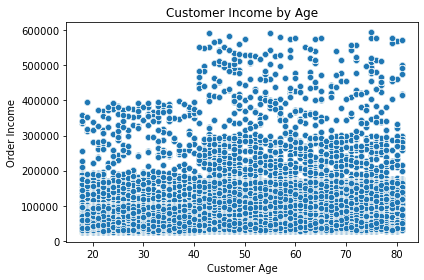

In [10]:
# Export age and spending power scatterplot
scatter = sns.scatterplot(x = 'customer_age', y = 'customer_income',data = master_df)
plt.ylabel("Order Income")
plt.xlabel("Customer Age")
plt.title("Customer Income by Age")
plt.tight_layout()

In [11]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending_scatter.png'))